In [163]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions


In [164]:
model = tf.keras.applications.MobileNetV2()


In [165]:
test_dir =  r'C:\Users\Krishna\Documents\codes\Strabismus Eyes Classification\dataset\testing'
train_dir = r'C:\Users\Krishna\Documents\codes\Strabismus Eyes Classification\dataset\training'

In [166]:
img_width, img_height = 160, 160
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 339 images belonging to 2 classes.


Found 173 images belonging to 2 classes.


In [167]:
train_data_shape = train_generator[0][0].shape
test_data_shape = test_generator[0][0].shape

print("Train Data Shape:", train_data_shape)
print("Test Data Shape:", test_data_shape)

Train Data Shape: (32, 160, 160, 3)
Test Data Shape: (32, 160, 160, 3)


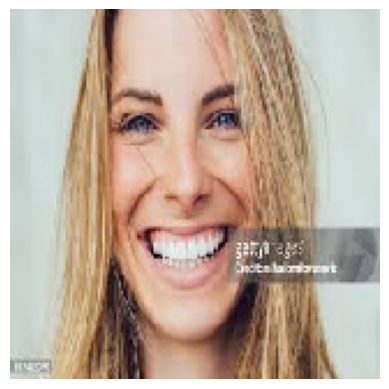

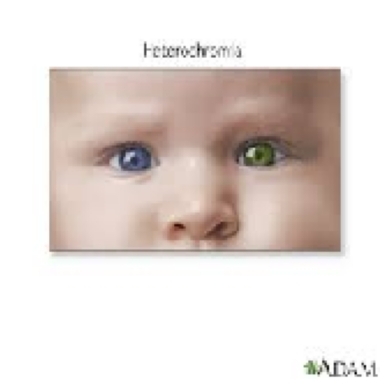

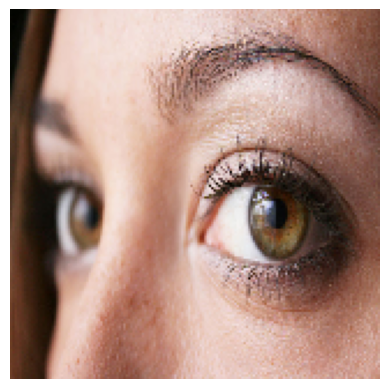

In [168]:
import matplotlib.pyplot as plt

# Define the indices of the images you want to print
image_indices = [0, 1, 2]

# Loop through the image indices and print the images
for index in image_indices:
    # Get the image from the test generator
    image = test_generator[index][0][0]
    
    # Plot the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [169]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)

In [170]:
base_model.trainable = False

In [171]:
from tensorflow.keras.regularizers import l2
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.0025))
# layer = tf.keras.layers.Dense(128, activation='relu')
# layer2 = tf.keras.layers.Dense(64, activation='relu')
# layer3 = tf.keras.layers.Dense(32, activation='relu')
# layer4 = tf.keras.layers.Dense(16, activation='relu')
# dropout_layer = tf.keras.layers.Dropout(0.5)
# dropout_layer2 = tf.keras.layers.Dropout(0.25)
# dropout_layer3 = tf.keras.layers.Dropout(0.125)

In [172]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,

    prediction_layer
])

In [173]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [174]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [175]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]   
)

Epoch 1/50


c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 744ms/step - accuracy: 0.5348 - loss: 0.8422 - val_accuracy: 0.6416 - val_loss: 0.6811
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - accuracy: 0.6558 - loss: 0.6335 - val_accuracy: 0.6474 - val_loss: 0.6583
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.7571 - loss: 0.4917 - val_accuracy: 0.6994 - val_loss: 0.5806
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.7785 - loss: 0.4579 - val_accuracy: 0.7052 - val_loss: 0.5452
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step - accuracy: 0.8074 - loss: 0.4317 - val_accuracy: 0.7283 - val_loss: 0.5376
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 475ms/step - accuracy: 0.8020 - loss: 0.3855 - val_accuracy: 0.7572 - val_loss: 0.5065
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 400ms/step - accuracy: 0.8551 - loss: 0.3600 - val_accuracy: 0.7399 - val_loss: 0.5122
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 449ms/step - accuracy: 0.8446 - loss: 0.3653 - val_accuracy: 0.7572 - val

In [176]:
accuracy = model.evaluate(test_generator)
print("Model Accuracy:", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.8236 - loss: 0.4115
Model Accuracy: [0.4194338023662567, 0.8150289058685303]


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 599ms/step


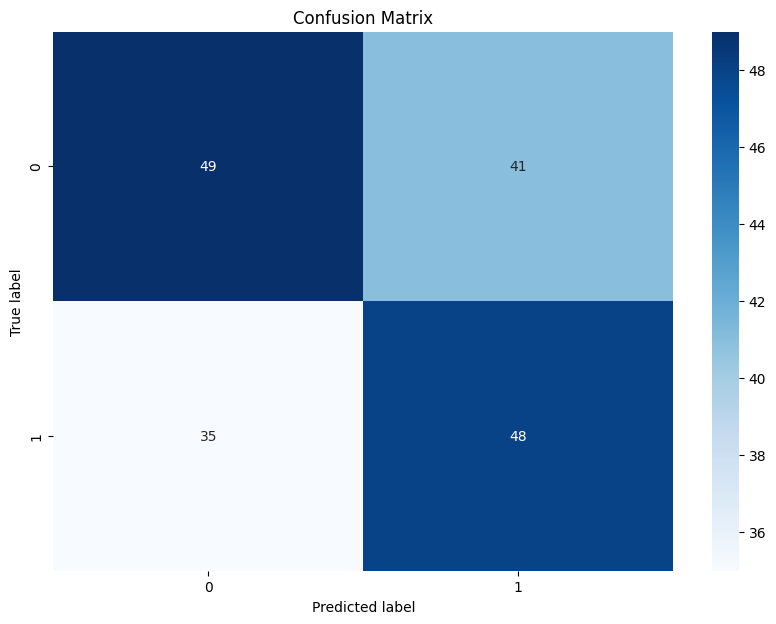

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate predictions for the test data
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Extract true labels from the test generator
true_labels = test_generator.classes
# Create the confusion matrix
cm = confusion_matrix(true_labels, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [178]:
class_names = train_generator.class_indices
print(class_names)

{'Crossed_Eyes': 0, 'normal eyes': 1}


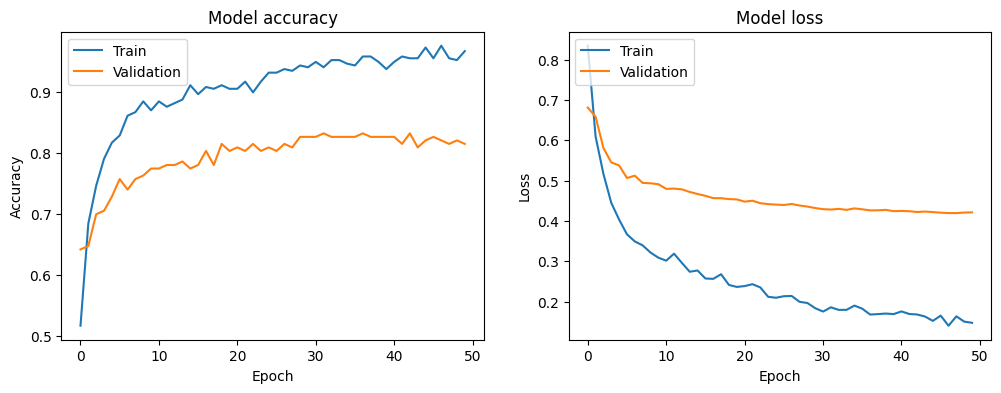

In [179]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [180]:

image_path = input('Enter the path of the image: ')
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

class_names = train_generator.class_indices
class_name = list(class_names.keys())[list(class_names.values()).index(predicted_class)]

print(f'The image belongs to class: {class_name}')
